# The Linear Model Assumptions
In the previous weeks, we outlined the modelling framework behind both simple and multiple regression. In doing so, we made a number of assumptions that allowed this framework to be tractable and useable. However, we never acually checked whether any of these assumptions held when using our example data. In this section, we will discuss the nature of checking modelling assumptions, as well as discussing each of the assumptions we made. In the rest of this lesson, we will discuss standard ways of checking these assumptions, as well as tactics that can be employed when those assumptions appear to be violated.

`````{admonition} The Generality of Assumptions
:class: tip
One of the bigger benefits of using a linear models framework is that, irrespective of the model form, the assumptions remain the same. As such, even though we will be framing these assumptions in relation to muliple regression, all the methods we will discuss are also directly relevant to $t$-tests, ANOVA and ANCOVA models. This means we can use the same diagnostics to check the same assumptions across any model. Practically, this means we only need to learn *one* set of assumptions and then can apply them to any model we choose. This is much more efficient than the typical approach of listing assumptions separately for regression, ANOVA and ANCOVA models. Furthermore, the solutions used to accommodate violations of these assumptions can be applied across regression, ANOVA and ANCOVA models, meaning that this lesson should be seen as a flexible set of tools that can be used for *all* linear models, not just for multiple regression.
`````

## The Nature of Assumptions, Visual Checks and Tests
Before discussion the assumptions themseleves, it is important that we establish a suitable perspective on assumptions and assumption testing. Typically, in the behavioural sciences, assumptions are not adequately checked. In part, this reflects a lack of appreciation for the importance of assumptions and, in part, reflects a lack of confidence around what to do if the assumptions are violated. When assumptions *are* tested, this is typically via *inferential tests*. In this course, we are going to advise against relying on tests for assessing assumptions. Instead, our focus will be on visual inspection of the assumptions. 

One of the key reasons why we caution against inferential tests is because they rely on NHST, with all the problems we discussed last week. In this context, it is especially important that assumptions are not considered black-and-white assessments of *met* or *violated*. In reality, no data will ever be perfectly normally distributed. No data will have identical variances across its range. No relationship will be a perfect straight line. Assumptions are an idealisation of reality in the name of mathematical simplicity. Our job is to determine whether the data are *close enough* for our conclusions to be accurate. If they are not close enough, then we need to either try and make adjustments, or we have to accept the consequences of these violations. Real world data is messy and so it is important to maintain both an appropriate perspective on the role of assumptions, as well as having enough tools available to deal with data that does not adequately adhere to those assumptions.

### Using Visual Assessments
Visual assessments of the model assumptions involve plotting aspects of the model in such a way that any violations of assumptions have a clear visual signature. All these types of plots are designed with this purpose in mind. Indeed, this is the way that working statisticians recommend the assumptions are checked. We can see this in `R`, where we ask for plots from a model fit with `lm()` and the following are produced

In [2]:
options(repr.plot.width=14, repr.plot.height=14)

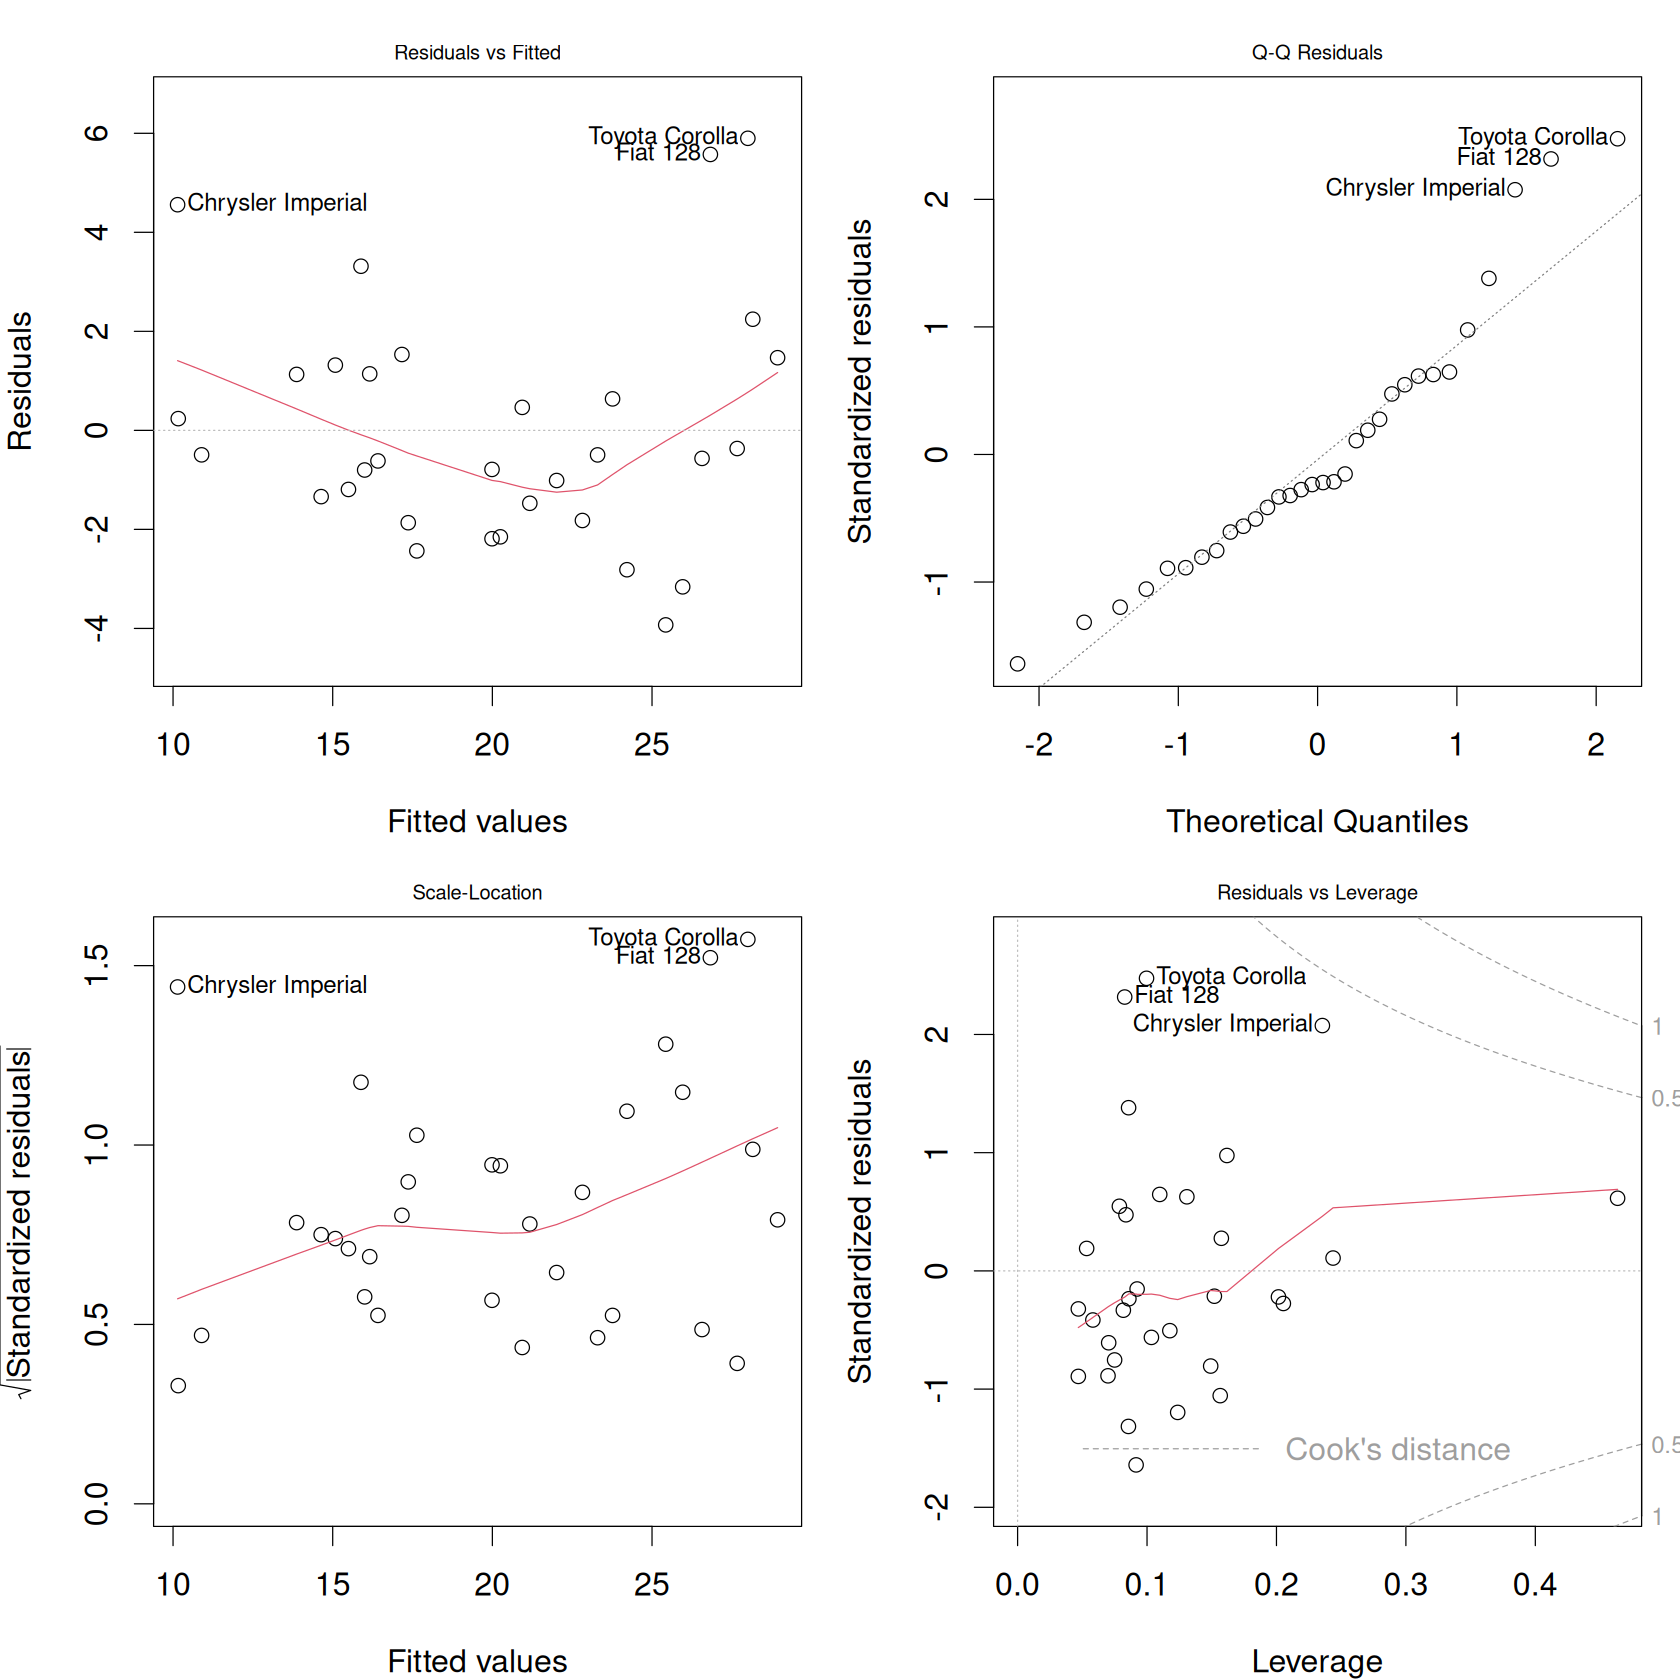

In [4]:
data(mtcars)
mod <- lm(mpg ~ wt + hp + cyl, data=mtcars)

par(mfrow=c(2,2),  mar=c(4,4,2,1))
par(cex=1.6) # plot scaling
plot(mod)

We will discuss what all these plots are showing us and how to interpret them later in this lesson. For now, just notice that the default method in `R` is to draw plots to check assumptions, *not* run a bunch of inferential tests of assumptions. This is for very good reason, as we will now discuss.

### Why Tests of Assumptions are Flawed
One of the reasons why researchers are sometimes uncomfortable with visual assessments is because they think that the interpetion is too subjective. Of course, there is a subjective element to deciding whether the assumptions appear adequately met, however, the belief that there is some objective alternative to determine this is flawed. Because inferential tests of these assumptions exist, there is a belief that these methods therefore provide a way of determining whether the assumptions are violated that is free from researcher bias. However, these tests are flawed. In the previous lesson, we discussed the problems with $p$-values and these issues carry-over into the world of inferential tests of model assumptions. If we do not believe that data will ever be *perfectly* normally distribution, or have *exactly the same* variance across the range of a variable, then the null hypothesis is known *a priori* to not be true. In this situation, all we need is enough data in order to conclude a significant violation of the assumption. Furthermore, tests of assumptions require assumptions themseleves in order to calculate $p$-values. Although rarely checked, the use of inferential tests for this purpose is then somewhat circular. Do we need inferential tests to check the assumptions of the inferential tests of assumptions? 

We can demonstrate some of these issue using simulated data. Here, we will use the Shapiro-Wilk test of normality to illustrate some problems. Firstly, we will generate a *small* sample of data from a $t$-distribution. Importantly, this is *not* a normal distribution and so if the test is objective and correct it should tell us that there is a significant depature from normality. Let us see what happens.

In [6]:
options(repr.plot.width=12, repr.plot.height=7)


	Shapiro-Wilk normality test

data:  y
W = 0.95294, p-value = 0.5719



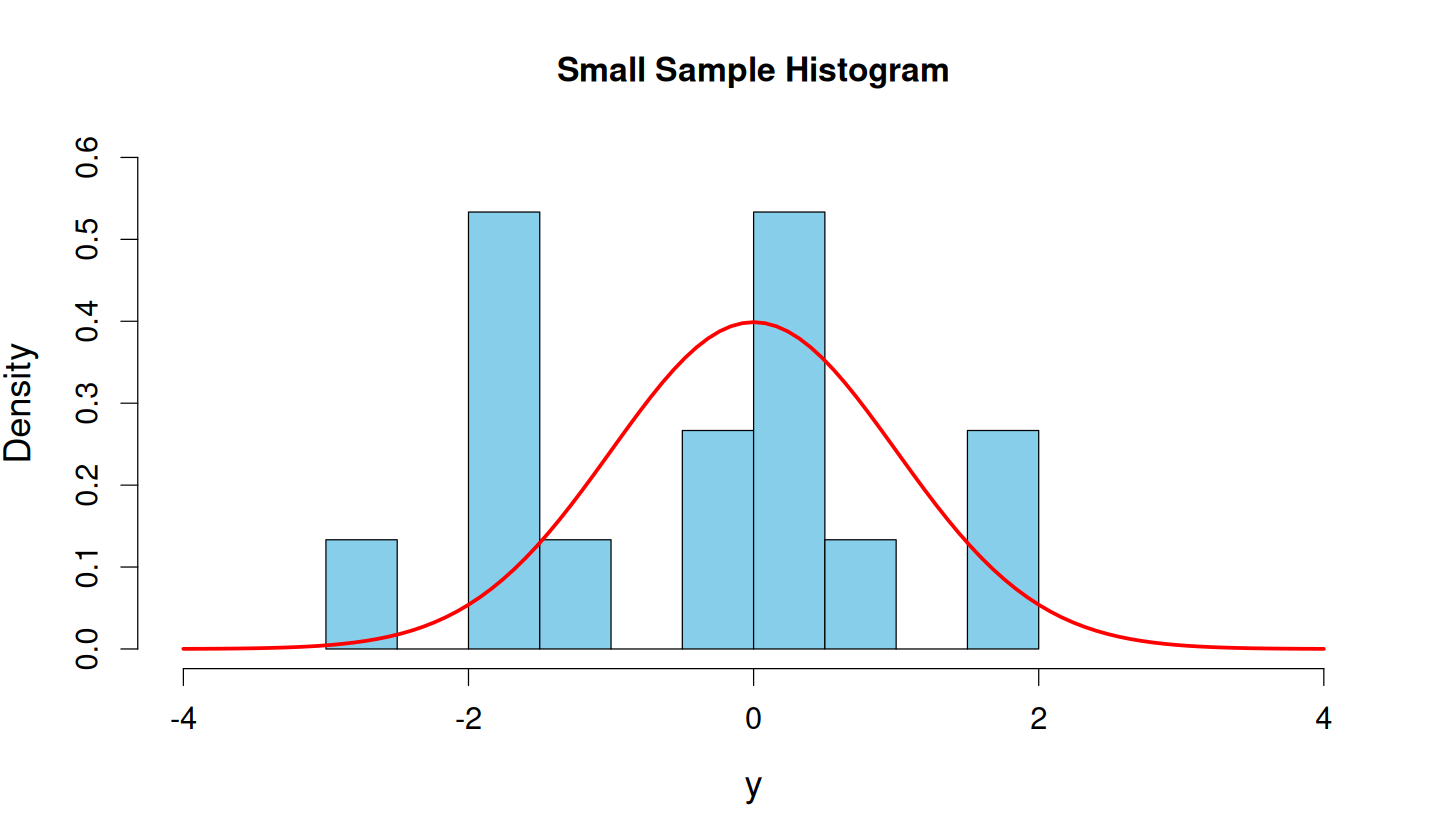

In [7]:
set.seed(666)
n <- 15
y <- rt(n, df=3)

# Run Shapiro-Wilk test
shap.test <- shapiro.test(y)
print(shap.test)

# Visualisation
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
hist(y, probability=TRUE, main="Small Sample Histogram", 
     col="skyblue", ylim=c(0,.6), xlim=c(-4,4), breaks=15)
curve(dnorm(x), col="red", lwd=3, add=TRUE)

The test has produced a *non-significant* $p$-value, which tells us that the test has failed to reject the null hypothesis that our data comes from a normal distribution. This would usually be interpreted as *no significant depature from normality*. The important point is that we know this is wrong. Would we have noticed this lack of normality from the visualisation? Looking the plot, we can see that the small sample actually makes it quite difficult to determine the distribution. Based on this, we should at least be wary of accepting any particular shape, but this is a subtlety that *cannot* be conveyed with the test. Importantly, the inferential test has not provided us with a correct objective alternative to our "subjective" interpretation of the plot. 

Let us see another example. This time we generate a *large* sample with a trivial depature from normality. The way we do this is by mixing together two normal distributions such that the overall distribution is only slightly non-normal. The aim is to do this in such a subtle way that it would have no practical implications. This is a situation where the data are *close enough* to the ideal for us to be confident that our model calculations will be accurate. But let us see what the test says.


	Shapiro-Wilk normality test

data:  y
W = 0.99836, p-value = 0.04526



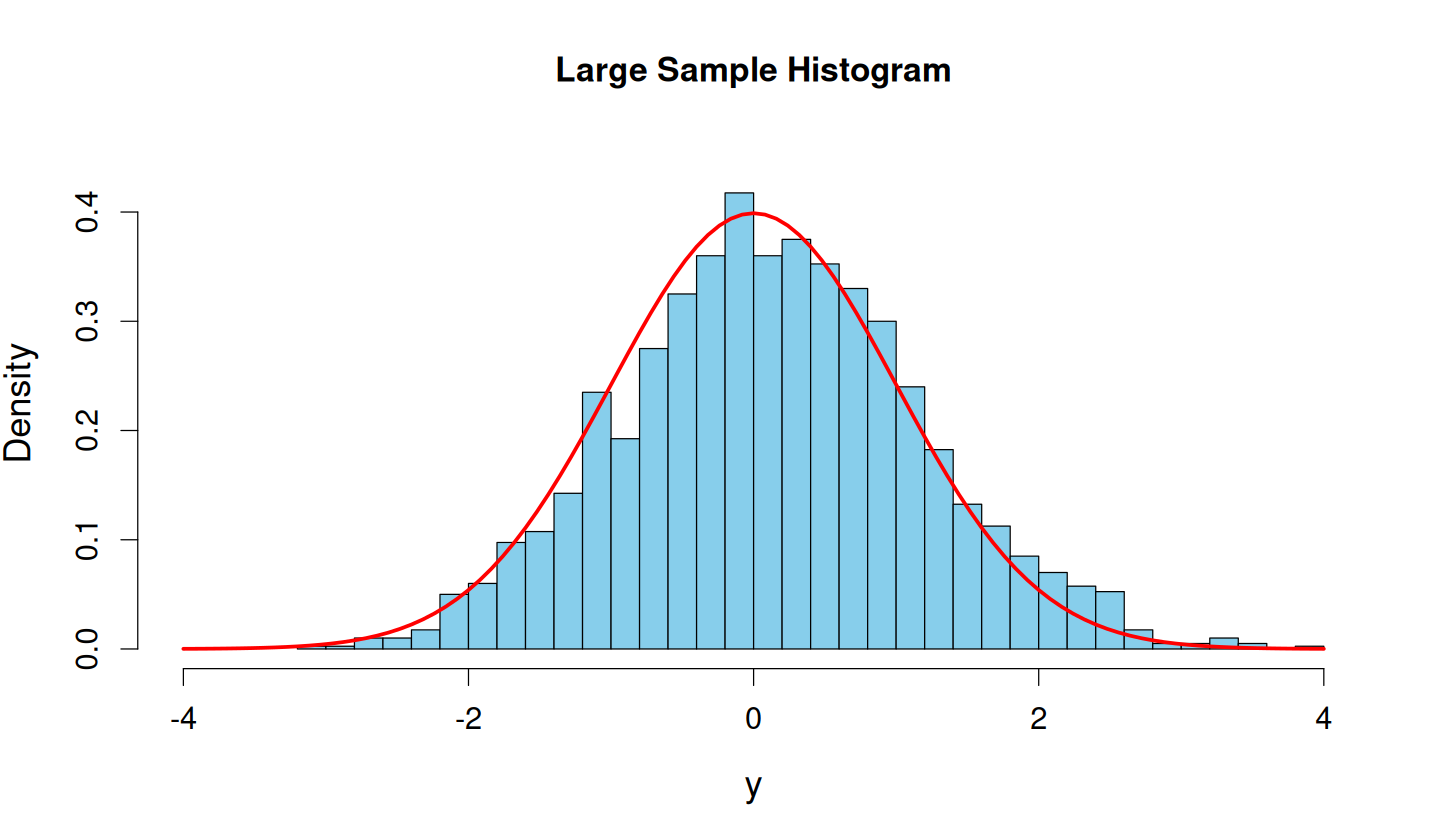

In [8]:
set.seed(123)
n <- 2000
y <- c(rnorm(n*0.9, mean=0, sd=1),
       rnorm(n*0.1, mean=1, sd=1))

# Run Shapiro-Wilk tests
shap.test <- shapiro.test(y)
print(shap.test)

# Visualisation
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
hist(y, probability=TRUE, main="Large Sample Histogram", 
     col="skyblue", ylim=c(0,.45), xlim=c(-4,4), breaks=25)
curve(dnorm(x), col="red", lwd=3, add=TRUE)


Here, the test says that there is a *significant* violation of normality. The test is not wrong, however, looking at the histogram it is very clear that the violation of slightly more density on the positive side of the distribution is very trivial. Practically, the distribution looks as close to normal as we are ever likely to see with real data. Based on this histogram, any attempt to correct for non-normality would likely be taken as wildly unnecessary. However, if we just believed the test then we could be off on a wild goose chase trying to change our model and transform our data to accomodate this violation. Again, visualising this assumption gives us the richest information for deciding how close to normal the distribution is and how comfortable we are relying on results that depend upon this assumption.

`````{admonition} Being *Open* About Assumption Visualisations
:class: tip
One of the most obvious worries about visual assumptions is that researchers who are desperate to generate results from their data could easily just dismiss very clear violations in these plots. This would be as simple as writing "visualisations of the assumptions revealed no concerning violations" in their paper. However, what we need to do as a field is *force* the addition of these assumption visualisations as supplementary materials for all papers. You cannot hide them if you are forced to publish them. So whenever evaluating these plots, try and think about whether they would convince other people? Think about whether you would be comfortable publishing these plots as part of a scientific publication? Lead the way by including them as supplementary materials and, as a reviewer, insist that authors make these plots public.
`````

## The Regression Assumptions
Now that we have an appropriate perspective on testing these assumptions, let us now detail the assumptions that are inherent in the linear model we have been using over the last few weeks. This is quite an important exericse, because the assumptions of regression often seem somewhat esoteric when taught outside the framework of statistical models. However, we should be able to derive all of them by simply examining the model equations we have used. This is the same approach we will take when we examine models such as ANOVA and ANCOVA, which will allow us to see that the assumptions *are always the same* when working within the linear models framework. To facilitate this discussion, let us restate the simple regression model

$$
\begin{align*}
    y_{i}        &= \beta_{0} + \beta_{1}x_{i} + \epsilon_{i} \\
    \epsilon_{i} &\overset{\text{i.i.d.}}{\sim} \mathcal{N}\left(0,\sigma^{2}\right).
\end{align*}
$$

We have cheated a little here and added the text $i.i.d.$ into the definition of the errors. We will discuss what this means below. However, with this addition, all the assumptions we have made in this model are written in the two lines above. Let us now unpack this in more detail.

### (1) The Outcome is a Continuous Random Variable
The first assumption we have made is that the outcome variable is a continuous random variable. As such, the *data-generating process* can be captured by some continuous probability distribution. This means our outcome variables must, in theory, have an infinite number of possibilities within a given range. You can refer back to the lessons earlier in the course for more details on this, as well as some of the subtlties around psychologists using discrete measures and treating them as continuous. Just know that if the outcome variable is *not* truly continuous then there may be some unexpected behaviour when checking other assumptions. This is because the data will not necessarily be spread across a wide range and will, instead, cluster at discrete points. 

### (2) The Distribution of the Errors is Normal
Following from the first assumption, we have chosen the normal distribution as the continuous probability distribution used to represent our population of interest. This assumption can be stated in two ways. The first is as a *marginal* distribution of $y$, given a specific value of $x$. This is expressed as

$$
y_{i} \sim \mathcal{N}\left(\beta_{0} + \beta_{1}x_{i},\sigma^{2}\right).
$$

This particular form is important to understand, not least because many people *get it wrong*. As should be clear from the equation above, the simple regression model does *not* assume that the entire outcome variable $y$ is normally distributed. Instead, the assumption is that the distribution of $y$ *at each value of $x$* is normally distributed. Considering only the distribution of a *subset* of $y$ values is known as the *marginal* distribution of $y$ given certain values of $x$. However, as we will see later in this lesson, this form is difficult to work with practically. This is because we would need enough values of $y$ at each value of $x$ to be able to assess the shape of the distribution. Furthermore, when $x$ has a wide range, we cannot do this in any practical way. As such, it is much easier to work with the *second form* that this assumption takes, which is that the *errors* are normally distributed with mean 0. This is expressed as

$$
\epsilon_{i} \sim \mathcal{N}\left(0,\sigma^{2}\right).
$$

Every error is therefore drawn from *the same distribution*. In other words, the errors represents a *sample* from a single distribution. Because of this, we can collapse all the errors together and just examine *one distribution*. Again, refer back to the content from earlier if you need a reminder of why this assumption can be stated in two different ways.

### (3) The Data/Errors are Uncorrelated
Another important assumption is that the data/errors are *uncorrelated*. When writing the simple regression model above, we added the text $i.i.d.$ to the definition of the errors. This means *independent and identically distributed*. The *identically distributed* part should be clear from the previous assumption, where each error is conceptually drawn from the *same* distribution. However, the *independent* part is also very important, but has been somewhat hidden until this point. In short, the model assumes that there is *no correlation* between the datapoints. This is implicit in the fact that no correlation is estimated, nor is it taken into account during any of the model calculations. As such, the implicit assumption is that

$$
\text{Corr}\left(y_{i},y_{i^{\prime}}\right) = \text{Corr}\left(\epsilon_{i},\epsilon_{i^{\prime}}\right) = 0,
$$

where the prime symbol is used to indicate that $i$ and $i^{\prime}$ should be taken as *different* numbers[^prime-foot]. As such, we are assuming that the data (and by extension the errors) are *independent* of each other.

Typically, this is not actually an assumption we test, rather we infer it based on the context of the data collection. For instance, in the `mtcars` example, there is no reason to think that the measurement of `mpg` from one car would impact the measurement from any other car. We therefore assume that all cars are independent and there will be no correlation. However, if we made the same measurement multiple times *on the same car*, then we would probably assume some degree of correlation (this would be an example of *repeated measurements*). The same is true of working with human subjects. When each measurement represents a different subject, we will typically assume independence. However, multiple measures of the same subject imply some degree of correlation and will require a different approach to modelling the data. We will see this later on the course in the form of *mixed-effects models*. But, for the time being, we will only be working with data assumed to be *independent*[^repmeasures-foot].

`````{admonition} Why Does Correlation Matter?
:class: tip
It may not be entirely clear at this stage why correlation would be such a concern. Although we will cover this in more detail later in the course, the short answers is that correlation adds quite a lot of complexity to modelling the data. This is both in terms of estimation, but also in terms of the correct calculation of standard errors when data are non-independent. For instance, a standard result in probability is that the variance of the *difference* between two random variables is

$$
\text{Var}\left(y_{1} - y_{2}\right) = \text{Var}\left(y_{1}\right) + \text{Var}\left(y_{2}\right) - 2\text{Cov}\left(y_{1},y_{2}\right).
$$

Here, $\text{Cov}$ stands for *covariance*, which is simply un-normalised correlation. From this we can see that the degree of correlation is necessary to get this value right. If we are trying to calculate differences between conditions of an experiment that are repeated measurements, we need to know the correlation, otherwise our standard errors will be wrong, our test-statistics will be wrong and the $p$-values will be wrong. As such, the accuracy of our inference depends upon using suitable methods that allow this correlation to be accommodated. 
`````

### (4) The Relationship is a Straight Line
One of the more obvious assumptions we have made within our regression model is that the relationship in the population is a *straight line*. This is not something we can every truly know, however, we need to examine whether a straight line appears *reasonable*, given the data we have available. We do not expect that any true relationship will be a perfect straight line. This is a simplifying assumption and so the aim is to see how *close* a straight line fit is within the data we have available. This is one of the few assumptions where there is no alternative to simply visualising the model fit and seeing whether it appears accurate. As we will see in the next part of this lesson, there are ways of assessing this visually without producing added-variable plots for each predictor, however, these types of plots are needed for understanding the contribution of each variable to any potential poor-fit. It could be that it is only one variable where a straight-line does not appear appropriate, or there could be several variables where this appears untenable. We will see how we can adjust predictors to accommodate any *non-linearities* in the fit later in this lesson. Using the general modelling framework we established previously, this can be thought of as the assumption that our *mean function* has the correct form.

### (5) The Variance is Constant
As a final assumption, we turn to the *variance* of the assumed distribution. Much like the assumption of a straight line concerns the correct form of the *mean function*, we also need to consider whether the *variance function* has a suitable form for our data. As mentioned in previous lessons, both simple and multiple regression have a very simply variance functions, where we assume that the spread of data around the regression line is *the same*, irrespective of the values of the predictors. This is captured by a *constant* variance term $\sigma^{2}$. Like other elements of the model, this is a *simplifying assumption*. We do not expect any real-world data to actually have *identical* spread around the regression line. If it is similar-enough across the range of the predictors, then we can continue with the assumption that the population variance is constant. However, if there is any clear pattern, such as variance *increasing* or *decreasing* as the values of the predictors change, then this assumption may not be tenable. The condition of having constant variance is known as *homoscedasticity*, with unequal variance known as *heteroscedasticity*[^scedasis-foot]. The problem with *heteroscedasticity* is that calculating a single variance terms from data where the variance changes will introduce bias in the form of *over-estimation* for some data points, and *under-estimation* for other data points. This also has a direct consequence for the accuracy of estimating the other parameters in the model, as well as calculating correct standard errors. So much like assumptions around correlation, we need the variance to be correct in order to guarantee accurate inference.

[^prime-foot]: So, $\text{Corr}\left(y_{i},y_{i^{\prime}}\right)$ just means "the correlation between two different values of $y$".

[^repmeasures-foot]: It is an interesting quirk of traditional statistical education in Psychology that repeated measures are introduced so early on. For Experimental Psychologists, repeated measurement designs (also known as *within-subject* designs) are very common because they allow for increased power and for each subject to act as their own control. However, the early introduction of this topic belies the degree of complexity that is added when it comes to statistical modelling. This can lead students astray, as the assumption is that repeated measurements should be easy to analyse, when this is actually far from the reality.

[^scedasis-foot]: These terms have their roots in the Greek word "skedasis", which means *dispersion* or *scattering*. So, homoscedasticity literally means "equal scattering" and heteroscedasticity literally means "unequal scattering". 